# Establecemos el directorio de trabajo

In [1]:
import os
os.chdir("/content/sample_data")

In [2]:
import pandas as pd
import numpy as np

# 1. Cargar los datos de Train.

In [3]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Para la variable “MSZoning” eliminar el valor “C (all)” y convertirlo en "C".

Vemos el contenido de la variable

In [ ]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

Podemos hacer el reemplazo con el método replace

In [4]:
df["MSZoning"] = df["MSZoning"].str.replace("C (all)","C")

# 3. Comprobar que se ha realizado correctamente el cambio.

In [5]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

In [10]:
(df["MSZoning"]=="C (all)").any()

np.False_

# 4. Crear una nueva variable que se llame Crisis.

In [11]:
df["Crisis"] = np.nan

In [12]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Crisis
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,NaN
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,NaN
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,NaN
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,NaN
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,NaN
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,NaN
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,NaN
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,NaN


# 5. Convertir esa columna en un valor booleano
Transformar la variable anterior para determinar (Debe tomar los valores Sí o No), basándose en la variable “YrSold”, si la casa se vendió en el periodo sin crisis (antes de 2008) o tras el estallido de la crisis (a partir de 2008).

In [13]:
df.loc[df["YrSold"]>=2008,"Crisis"] = "Sí"

/tmp/ipython-input-13-4267113570.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sí' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df["YrSold"]>=2008,"Crisis"] = "Sí"


In [15]:
df.loc[df["YrSold"]<2008,"Crisis"] = "No"

In [22]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Crisis
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Sí
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,No
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Sí
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,No
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,No
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,Sí
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,Sí
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,Sí


Otra forma de hacerlo. Con `apply()`

In [17]:
df["Crisis"] = np.nan

In [20]:
def es_crisis(valor):
    if valor>=2008:
        return "Sí"
    else:
        return "No"

In [21]:
df["Crisis"] = df["YrSold"].apply(es_crisis)

# 6. Comprobar que se ha realizado correctamente.

<Axes: ylabel='Crisis'>

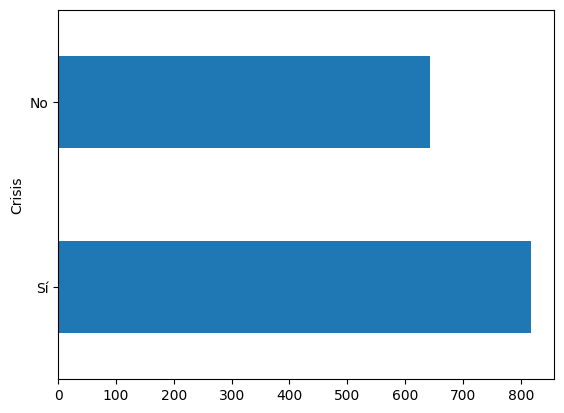

In [24]:
df["Crisis"].value_counts().plot(kind ="barh")

# 7. Crear un nuevo grupo de datos con las 10 casas más caras, en función de la variable “SalePrice”.

In [25]:
df_top10 = df.sort_values(by="SalePrice",ascending=False).head(10)
df_top10

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Crisis
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,No
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,No
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,WD,Normal,625000,No
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,3,2010,New,Partial,611657,Sí
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2009,New,Partial,582933,Sí
1046,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2006,New,Partial,556581,No
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2009,WD,Normal,555000,Sí
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,538000,Sí
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,501837,Sí
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,7,2009,New,Partial,485000,Sí


# 8. Determinar la calle en la que se encuentra la casa más cara.

In [26]:
maximo_precio = df_top10["SalePrice"].max()

df_top10.loc[df["SalePrice"]== maximo_precio, "Street"].values[0]

'Pave'

# 9. Crear una variable llamada “Reforma” y que muestre los años que pasaron entre la última  reforma y la venta (YrSold-YearRemodAdd).

In [27]:
df["Reforma"] = df["YrSold"] - df["YearRemodAdd"]

# 10. Guardar los datos.

In [29]:
df.to_csv("Salida.csv", index=False)